In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline



#### 1. Use the code provided below to get the data, and run the train-test split. Description of each column can be found in [sklearn documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) for the `load_diabetes` method to know what are `as_frame` and `scaled` for.

In [55]:
diabetes = load_diabetes()

X, y = load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


#### 2. Run a multivariate linear regression on all variables **(1 point)**

In [56]:
# Perform multivariate linear regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_predictions = linear_regression.predict(X_test)

# Calculate the Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) for linear regression
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mape = mean_absolute_percentage_error(y_test, linear_predictions)


# Print the MAE and MAPE
print("Linear Regression MAE:", linear_mae)
print("Linear Regression MAPE:", linear_mape)

Linear Regression MAE: 42.794094679599944
Linear Regression MAPE: 0.3749982636756115


#### 3. Run a multivariate polynomial regression of the 2nd degree on all variable (Hint: set `include_bias=False` in `PolynomialFeatures`) **(2 points)**

In [57]:
# Create a pipeline for polynomial regression
pipeline = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions using the pipeline
poly_predictions = pipeline.predict(X_test)

# To retrive the polynomial regression features
poly_feature_names = polynomial_features.get_feature_names_out(diabetes.feature_names)

# Calculate the Mean Absolute Error (MAE)
poly_mae = mean_absolute_error(y_test, poly_predictions)
poly_mape = mean_absolute_percentage_error(y_test, poly_predictions)

# Print the MAE
print("Polynomial Regression MAE:", poly_mae)
print("Polynomial Regression MAPE:", poly_mape)


Polynomial Regression MAE: 43.5816932543383
Polynomial Regression MAPE: 0.38285678513539867


#### 4. Compare the two models by looking at MAE and MAPE using the provided function

In [58]:
# Print the results
print("Linear Regression MAE:", linear_mae)
print("Linear Regression MAPE:", linear_mape)
print("Polynomial Regression MAE:", poly_mae)
print("Polynomial Regression MAPE:", poly_mape)


Linear Regression MAE: 42.794094679599944
Linear Regression MAPE: 0.3749982636756115
Polynomial Regression MAE: 43.5816932543383
Polynomial Regression MAPE: 0.38285678513539867


MAE represents the average absolute difference between the predicted and actual values, while the MAPE provides the average percentage difference between the predicted and actual values. By comparing the values of MAE and MAPE, you can assess the performance of the two models multivariate linear regression and polynomial regression (2nd degree) on the diabetes dataset and determine which one provides better results.

Here lower the error difference better the model and so multivariate linear regression with MAE 42.79 and MAPE 0.37 is better than the polynomial regresion of 2nd degree with MAE 43.58 and MAPE 0.38

#### Plotting MAE and MAPE for visualization

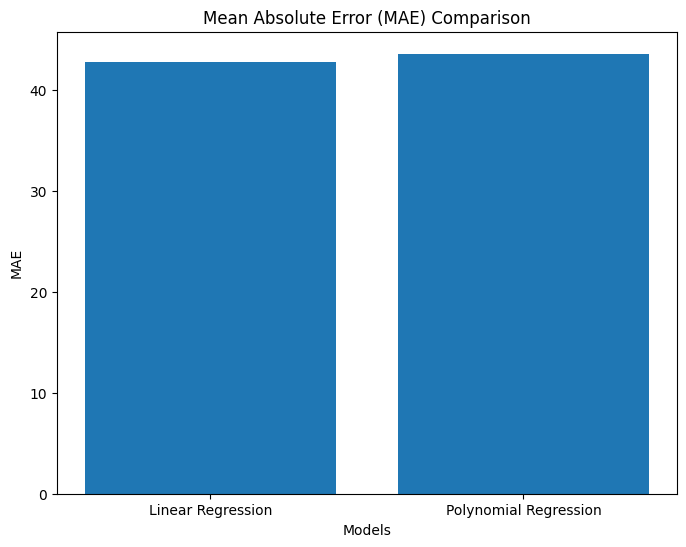

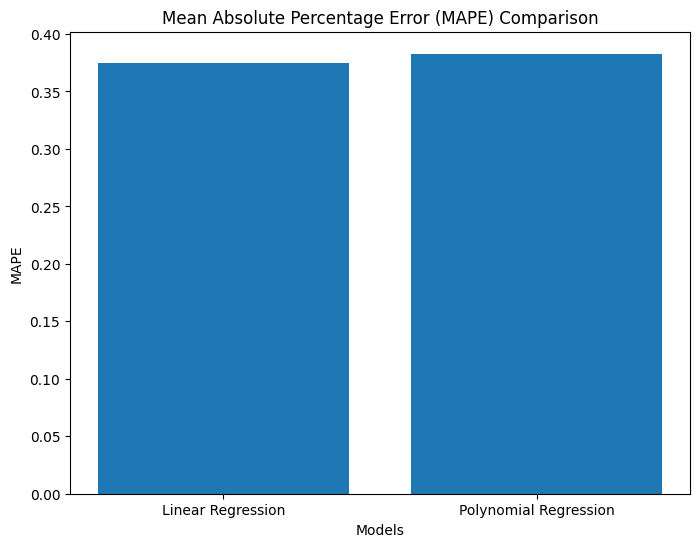

In [59]:

# Define the models and their corresponding MAE and MAPE values
models = ['Linear Regression', 'Polynomial Regression']
mae_values = [linear_mae, poly_mae]
mape_values = [linear_mape, poly_mape]  # MAPE value for Linear Regression is 0 since it wasn't calculated

# Create a bar chart for MAE
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.show()

# Create a bar chart for MAPE
plt.figure(figsize=(8, 6))
plt.bar(models, mape_values)
plt.xlabel('Models')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percentage Error (MAPE) Comparison')
plt.show()

#### 5. You can add any further comparisons and code (this is not necessary for a perfect score, but will be reviewed and evaluated)


### At the end of your submission file, please answer the following questions **(3 points)**:

In [ ]:
# Print the number of parameters for linear regression and polynomial regression
print("Number of parameters in linear regression:", X_train.shape[1])
print("Number of parameters in polynomial regression:", len(poly_feature_names))

Number of parameters in linear regression: 10
Number of parameters in polynomial regression: 65


#### 1. How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values. Hint: for explaining the parameters of the polynomial regression, you can use `poly.get_feature_names_out()`.

In a linear regression, the number of features or variables in the dataset and the number of parameters being fitted are the same. The diabetes dataset has 10 input characteristics, which means the linear regression model would need to fit 10 parameters.

In a polynomial regression, the degree of the polynomial and the number of input characteristics affect how many parameters are fitted. For instance, using poly_features.get_feature_names_out(), it is possible to determine the number of parameters in the above code snippet with polynomial regression of the second degree. The function returns the names of the newly formed polynomial features, and the number of parameters may be calculated by counting how many different feature names available. 

Here polynomial regression incorporates more interaction factors and higher-order terms than linear regression, so the number of parameters might be much greater in polynomial than linear regression.



#### 2. Which model would you choose for deployment, and why?

Here the linear regresion model has less error factor based on MAE and MAPE than polynomial regression. Usually linear regression has linear connecetion between the input and target variable so its simpler to comprehend and has less computational cost where as polynomial regression has non linear relationship between the input and target variable but potentially enhances the model performance. That is not the case in the above model. 

So I would linear regresion model for deployment for its better performance, reduced computational cost and interpretability.



#### 3. What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

The graphs MAE and MAPE provides following insights on the goodness-of-fit of the given models

The MAE is the measure of average absolute difference between the predicted and actual values. A lower MAE in the bar graphs denotes a better fit between the model and the data. So the linear regresion has the smaller average absolute difference, suggesting better overall fit.

The MAPE is the measure of average percentage difference between the predicted and actual values. A lower MAPE in the bar graphs denotes a better fit between the model and the data. So the linear regresion has the smaller average percentage difference, suggesting better overall fit.

Based on the MAE and MAPE metrics, these graphs enable a visual comparison of the models' goodness-of-fit. Lower values for both measures imply improved model performance in terms of precision and the clossness of predictions to actual values.
